In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# from sklearn.metrics import  classification_report
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import roc_curve, auc

# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score

# from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier

%matplotlib inline 

In [2]:
import importlib
import ids_common
importlib.reload(ids_common)

<module 'ids_common' from 'd:\\stuff\\univ\\ids\\ids_common.py'>

In [3]:
df_orig = pd.read_csv('./sampled_data/sample_1/clean_dataset.csv', low_memory=False)

df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368942 entries, 0 to 3368941
Data columns (total 63 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   arp.opcode                           float64
 1   arp.hw.size                          float64
 2   icmp.checksum                        float64
 3   icmp.seq_le                          float64
 4   icmp.unused                          float64
 5   http.content_length                  float64
 6   http.response                        float64
 7   http.tls_port                        float64
 8   tcp.ack                              float64
 9   tcp.ack_raw                          float64
 10  tcp.checksum                         float64
 11  tcp.connection.fin                   float64
 12  tcp.connection.rst                   float64
 13  tcp.connection.syn                   float64
 14  tcp.connection.synack                float64
 15  tcp.flags                       

In [4]:
from sklearn.manifold import TSNE

In [6]:
df = df_orig.copy()

print(df.shape)
df.shape[0]/100

(3368942, 63)


33689.42

In [13]:
sample = df.sample(n=df.shape[0]//400)
sample.shape

(8422, 63)

In [14]:
target_label_2_class = 'Attack_label' # 0 indicates normal and 1 indicates attacks
target_label_15_class = 'Attack_type'


y2 = sample[target_label_2_class]
y15 = sample[target_label_15_class]
X = sample.drop([target_label_2_class, target_label_15_class], axis=1, inplace=False)

In [15]:
tsne = TSNE()
tsne_result  = tsne.fit_transform(X)
# 8k = 13 sec
# 16k * 63 = 28 sec


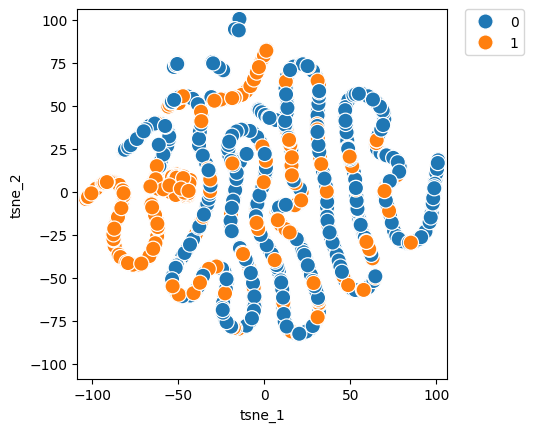

In [16]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y2})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

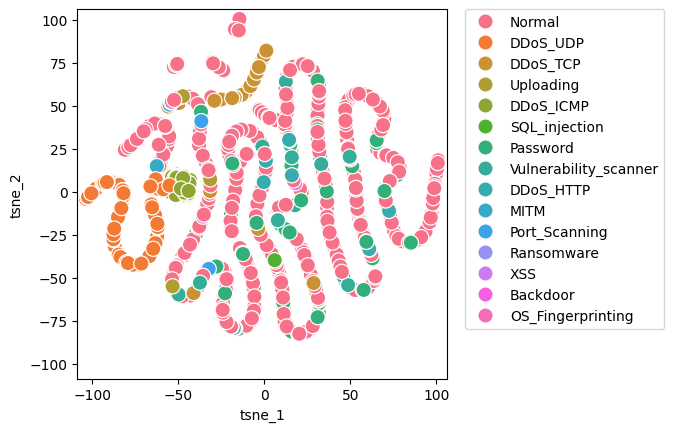

In [17]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y15})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [16]:
df = pd.read_csv('./sampled_data/sample_1/combined_dataset.csv', low_memory=False)
# df.info()

Before: shape=(4066850, 63)
Before: dropna: NA: 0, DUPS: 603202
After: dropna: NA: 0, DUPS: 0
After: shape=(3463648, 48)


In [ ]:
ids_common.ferrag_preparation(df, verbose=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3463648 entries, 0 to 4066849
Data columns (total 48 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   arp.opcode                 object 
 1   arp.hw.size                object 
 2   icmp.checksum              object 
 3   icmp.seq_le                object 
 4   icmp.unused                float64
 5   http.content_length        float64
 6   http.request.method        object 
 7   http.referer               object 
 8   http.request.version       object 
 9   http.response              float64
 10  http.tls_port              float64
 11  tcp.ack                    float64
 12  tcp.ack_raw                object 
 13  tcp.checksum               object 
 14  tcp.connection.fin         object 
 15  tcp.connection.rst         float64
 16  tcp.connection.syn         float64
 17  tcp.connection.synack      float64
 18  tcp.flags                  object 
 19  tcp.flags.ack              float64
 20  tcp.len

In [18]:
ds_stats = dict()

for col in df.columns:
        if col in ids_common.dropped_by_ferrag:
            continue
        
        uniques = df[col].unique()
        num_uniq = len(uniques)
        vc = '[too many]'
        if num_uniq < 16:
            vc = df[col].value_counts()
        else:
            uniques = uniques[:8] + uniques[-8:]

        ds_stats[col] = (num_uniq, uniques, vc)
        


In [21]:
for col, uniques in ds_stats.items():
    num, unqs, gr = uniques
    pr = '*' if num != 1 else ''

    print(f'{pr}\t{col} {num} {unqs}')
    print(f'\t{gr}')
    print('-'*80)

    

*	arp.opcode 8 ['0.0' '1.0' '2.0' '6.0' '0' '2' '192.168.0.128' '1']
	arp.opcode
0.0              3156909
0                 306699
1.0                   14
2.0                   14
6.0                    9
2                      1
192.168.0.128          1
1                      1
Name: count, dtype: int64
--------------------------------------------------------------------------------
*	arp.hw.size 10 ['0.0' '6.0' '0' '192.168.0.128' '192.168.0.170' '192.168.0.101'
 '192.168.7.55' '192.168.7.1' '192.168.0.1' '192.168.7.62']
	arp.hw.size
0.0              3064264
0                 399345
6.0                   30
192.168.0.128          2
192.168.0.101          2
192.168.0.170          1
192.168.7.55           1
192.168.7.1            1
192.168.0.1            1
192.168.7.62           1
Name: count, dtype: int64
--------------------------------------------------------------------------------
*	icmp.checksum 64852 ['0x0000be350x0000611d' '0x0000ea580x000061fd' '0x00003dfb0.0'
 '0x0000524a0x0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3463648 entries, 0 to 4066849
Data columns (total 48 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   arp.opcode                 object 
 1   arp.hw.size                object 
 2   icmp.checksum              object 
 3   icmp.seq_le                object 
 4   icmp.unused                float64
 5   http.content_length        float64
 6   http.request.method        object 
 7   http.referer               object 
 8   http.request.version       object 
 9   http.response              float64
 10  http.tls_port              float64
 11  tcp.ack                    float64
 12  tcp.ack_raw                object 
 13  tcp.checksum               object 
 14  tcp.connection.fin         object 
 15  tcp.connection.rst         float64
 16  tcp.connection.syn         float64
 17  tcp.connection.synack      float64
 18  tcp.flags                  object 
 19  tcp.flags.ack              float64
 20  tcp.len

In [8]:
ddf = pd.read_csv('./dataset/Edge-IIoTset-dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv', low_memory=False)
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219201 entries, 0 to 2219200
Data columns (total 63 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   frame.time                 object 
 1   ip.src_host                object 
 2   ip.dst_host                object 
 3   arp.dst.proto_ipv4         object 
 4   arp.opcode                 float64
 5   arp.hw.size                float64
 6   arp.src.proto_ipv4         object 
 7   icmp.checksum              float64
 8   icmp.seq_le                float64
 9   icmp.transmit_timestamp    float64
 10  icmp.unused                float64
 11  http.file_data             object 
 12  http.content_length        float64
 13  http.request.uri.query     object 
 14  http.request.method        object 
 15  http.referer               object 
 16  http.request.full_uri      object 
 17  http.request.version       object 
 18  http.response              float64
 19  http.tls_port              float64
 20  tc

In [10]:
d = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  2 non-null      object
 1   number  2 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 164.0+ bytes


In [11]:
d0 = pd.DataFrame()
pd.concat([d0, d], ignore_index=True)

,letter,number
0,a,1
1,b,2
